In [1]:
import warnings
import requests
from datetime import datetime
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
# warning 메시지 출력 안함
warnings.filterwarnings('ignore')

In [3]:
# 최신 회차 크롤링 함수
def get_max_count():
    url = 'https://dhlottery.co.kr/common.do?method=main'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    max_count = int(soup.find('strong', id='lottoDrwNo').text)
    return max_count

In [8]:
# 로또 당첨번호 정보 조회 함수
def crawling_lotto(count):
    # url에 회차를 실어 페이지 조회
    url = f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')

    date = datetime.strptime(soup.find('p', class_='desc').text, '(%Y년 %m월 %d일 추첨)')
    win_number = [int(i) for i in soup.find('div', class_='num win').find('p').text.strip().split('\n')]
    bonus_number = int(soup.find('div', class_='num bonus').find('p').text.strip())

    return {
        'date' : date,
        'win_number' : win_number,
        'bonus_number' : bonus_number
    }

In [9]:
# 최신 회차 가져오기
max_count = get_max_count()

# 전체 회차 크롤링
data_list = []
for i in tqdm(range(1, max_count + 1)):
    result = crawling_lotto(i)
    data_list.append({
        'date' : result['date'],
        'num1' : result['win_number'][0],
        'num2' : result['win_number'][1],
        'num3' : result['win_number'][2],
        'num4' : result['win_number'][3],
        'num5' : result['win_number'][4],
        'num6' : result['win_number'][5],
        'bonus' : result['bonus_number']
    })
# 데이터를 데이터프레임으로 변환
data = pd.DataFrame(data_list)
data

100%|██████████| 1124/1124 [04:51<00:00,  3.85it/s]


,date,num1,num2,num3,num4,num5,num6,bonus
0,2002-12-07,10,23,29,33,37,40,16
1,2002-12-14,9,13,21,25,32,42,2
2,2002-12-21,11,16,19,21,27,31,30
3,2002-12-28,14,27,30,31,40,42,2
4,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1119,2024-05-18,2,19,26,31,38,41,34
1120,2024-05-25,6,24,31,32,38,44,8
1121,2024-06-01,3,6,21,30,34,35,22
1122,2024-06-08,13,19,21,24,34,35,26


In [11]:
# 크롤링한 로또번호를 csv파일로 저장
csv_filename = 'lotto_result.csv'
data.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 '{csv_filename}' 이름으로 저장되었습니다.")

CSV 파일이 'lotto_result.csv' 이름으로 저장되었습니다.


In [2]:
# 저장한 csv파일 불러오기
csv_filename = 'lotto_result.csv'
lotto_data = pd.read_csv(csv_filename, encoding='utf-8-sig')

In [25]:
# 로또 번호를 한 리스트에 모으기
numbers = []
columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']

for column in columns:
    for number in lotto_data[column]:
        numbers.append(number)

In [23]:
# 필요 패키지 import
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [40]:
#numbers

In [27]:
# 숫자의 빈도 계산
number_counts = Counter(numbers)

In [34]:
number_counts

Counter({34: 172,
         18: 165,
         12: 164,
         45: 163,
         13: 162,
         14: 161,
         33: 159,
         40: 159,
         17: 158,
         27: 158,
         20: 157,
         43: 157,
         1: 155,
         3: 154,
         37: 154,
         21: 153,
         39: 153,
         11: 152,
         7: 152,
         26: 152,
         19: 152,
         31: 152,
         38: 152,
         36: 151,
         44: 151,
         16: 150,
         24: 150,
         10: 149,
         4: 149,
         6: 148,
         15: 148,
         35: 148,
         42: 144,
         2: 143,
         30: 143,
         8: 142,
         5: 140,
         29: 140,
         25: 138,
         41: 138,
         23: 136,
         28: 135,
         22: 134,
         32: 133,
         9: 118})

In [36]:
number_counts.items()

dict_items([(10, 149), (9, 118), (11, 152), (14, 161), (16, 150), (2, 143), (8, 142), (1, 155), (22, 134), (3, 154), (6, 148), (4, 149), (5, 140), (7, 152), (13, 162), (17, 158), (26, 152), (12, 164), (19, 152), (21, 153), (24, 150), (15, 148), (35, 148), (18, 165), (25, 138), (23, 136), (20, 157), (29, 140), (27, 158), (30, 143), (31, 152), (32, 133), (28, 135), (34, 172), (36, 151), (33, 159), (37, 154), (38, 152), (39, 153), (40, 159), (42, 144), (41, 138), (43, 157), (44, 151), (45, 163)])

In [30]:
number_counts_str = {str(key): value for key, value in number_counts.items()}

In [31]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(number_counts_str)

In [32]:
import matplotlib.pyplot as plt

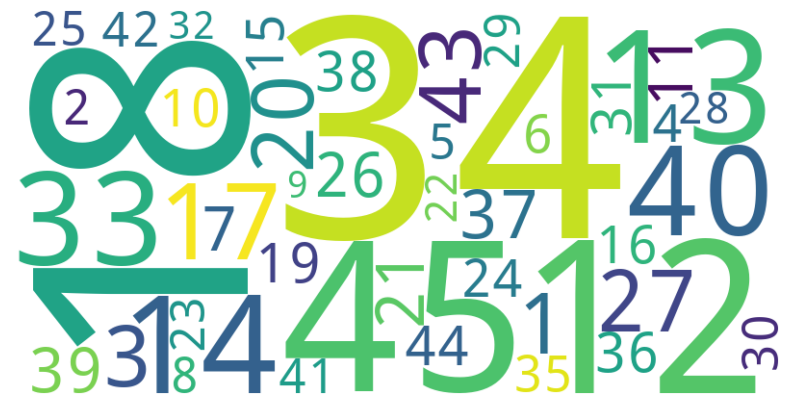

In [33]:
# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# 데이터를 정렬된 리스트로 변환
labels, values = zip(*sorted(number_counts.items()))

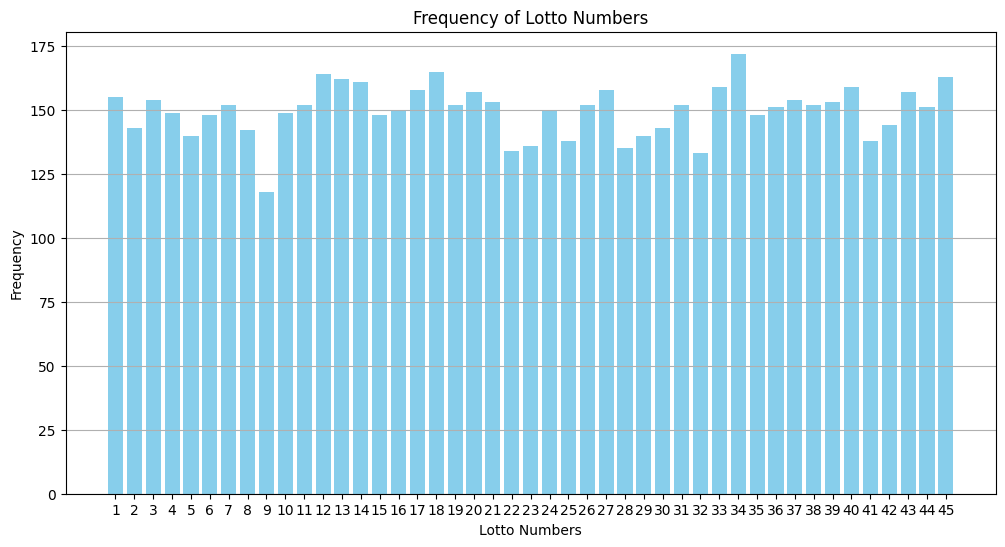

In [39]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Lotto Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Lotto Numbers')
plt.xticks(range(min(labels), max(labels)+1))
plt.grid(axis='y')

#그래프 표시
plt.show()